---
title: "Unsupervised Learning"
format:
    html: 
        code-fold: false
---

<!-- After digesting the instructions, you can delete this cell, these are assignment instructions and do not need to be included in your final submission.  -->

{{< include instructions.qmd >}} 

# Code 

Provide the source code used for this section of the project here.

If you're using a package for code organization, you can import it at this point. However, make sure that the **actual workflow steps**—including data processing, analysis, and other key tasks—are conducted and clearly demonstrated on this page. The goal is to show the technical flow of your project, highlighting how the code is executed to achieve your results.

If relevant, link to additional documentation or external references that explain any complex components. This section should give readers a clear view of how the project is implemented from a technical perspective.

Remember, this page is a technical narrative, NOT just a notebook with a collection of code cells, include in-line Prose, to describe what is going on.

In [30]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('../../data/processed-data/Normalized_Data_with_Sentiments.csv')

# Specify the feature columns
features = [
    'Days Since Published', 'View Count', 'Like Count', 'Comment Count',
    'Subscriber Count', 'Definition', 'Mean Sentiment Score',
    'Duration_seconds', 'genre_label', 'singer_followers', 'singer_popularity'
]

# Ensure the target column 'popularity' exists in DataFrame
if 'Popularity' not in df.columns:
    raise ValueError("The 'popularity' column is missing from the DataFrame.")

# Split into input (X) and target (y)
X = df[features]  # Inputs
y = df['Popularity']  # Target

# Applying PCA
pca = PCA(n_components=3)  # Reduce to 4 dimensions for visualization
X_pca = pca.fit_transform(X)
# How much variance was retained?
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Explained:", sum(pca.explained_variance_ratio_))

Explained Variance Ratio: [0.35411601 0.1606999  0.12194563]
Total Variance Explained: 0.6367615347014879


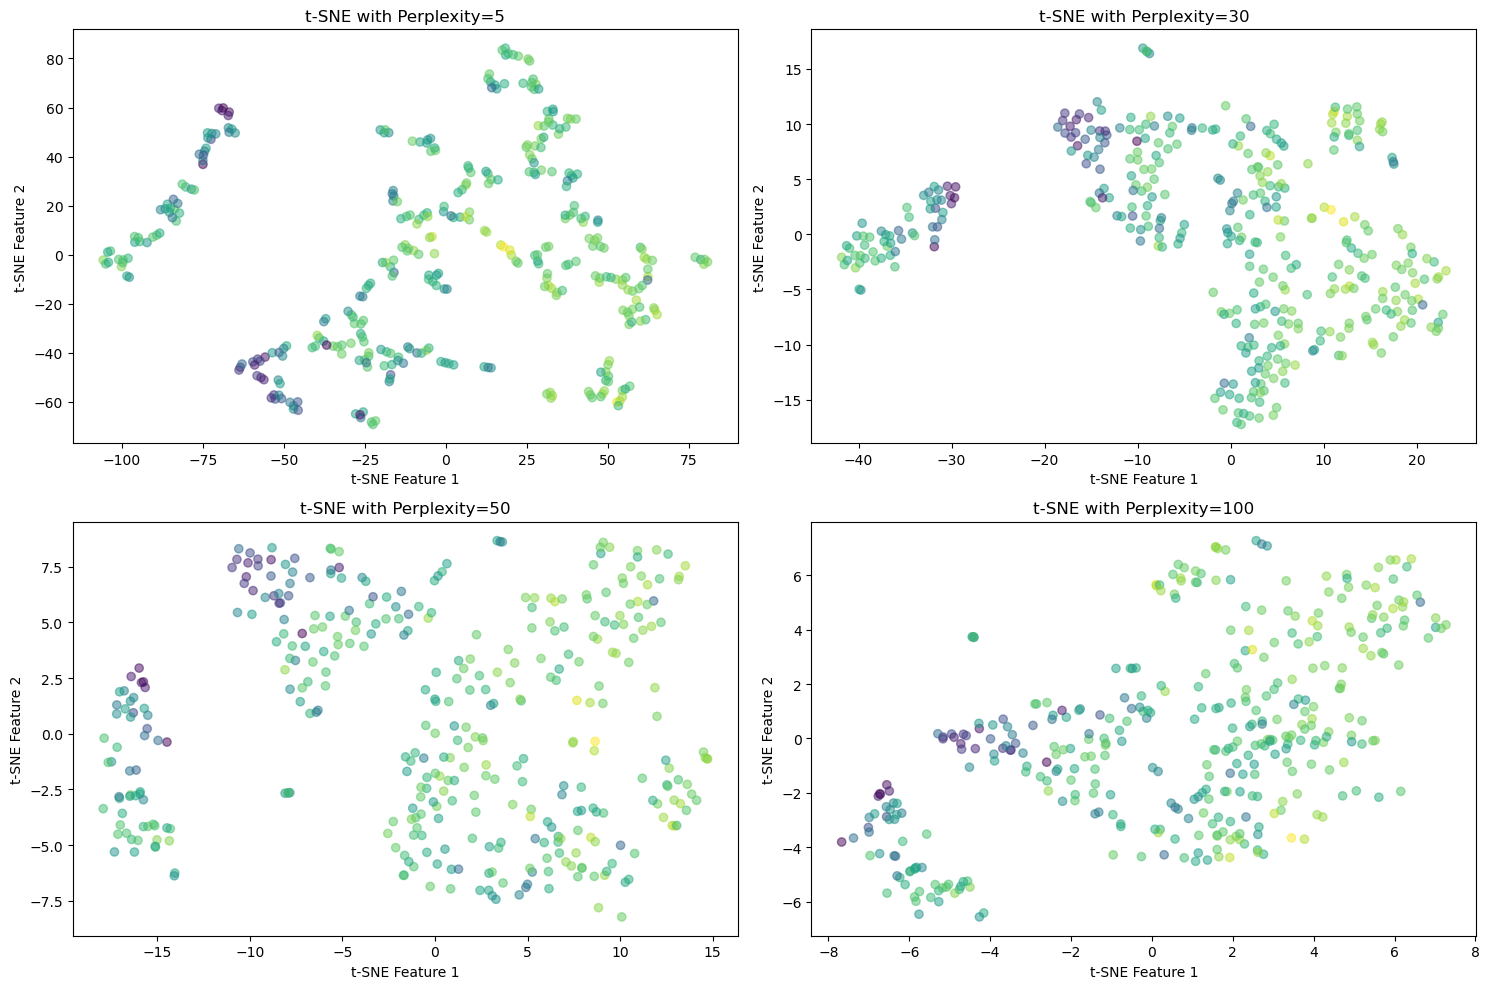

In [31]:
# Experimenting with different perplexity values
perplexities = [5, 30, 50, 100]
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
for i, perplexity in enumerate(perplexities):
    # Applying t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=3000, random_state=42)
    X_tsne = tsne.fit_transform(X)

    # Plotting
    ax[i//2, i%2].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', marker='o', alpha=0.5)
    ax[i//2, i%2].set_title(f't-SNE with Perplexity={perplexity}')
    ax[i//2, i%2].set_xlabel('t-SNE Feature 1')
    ax[i//2, i%2].set_ylabel('t-SNE Feature 2')

plt.tight_layout()
plt.show()

Explained Variance Ratio: [0.35411601 0.1606999 ]
Total Variance Explained by 2 PCs: 0.5148159010329216


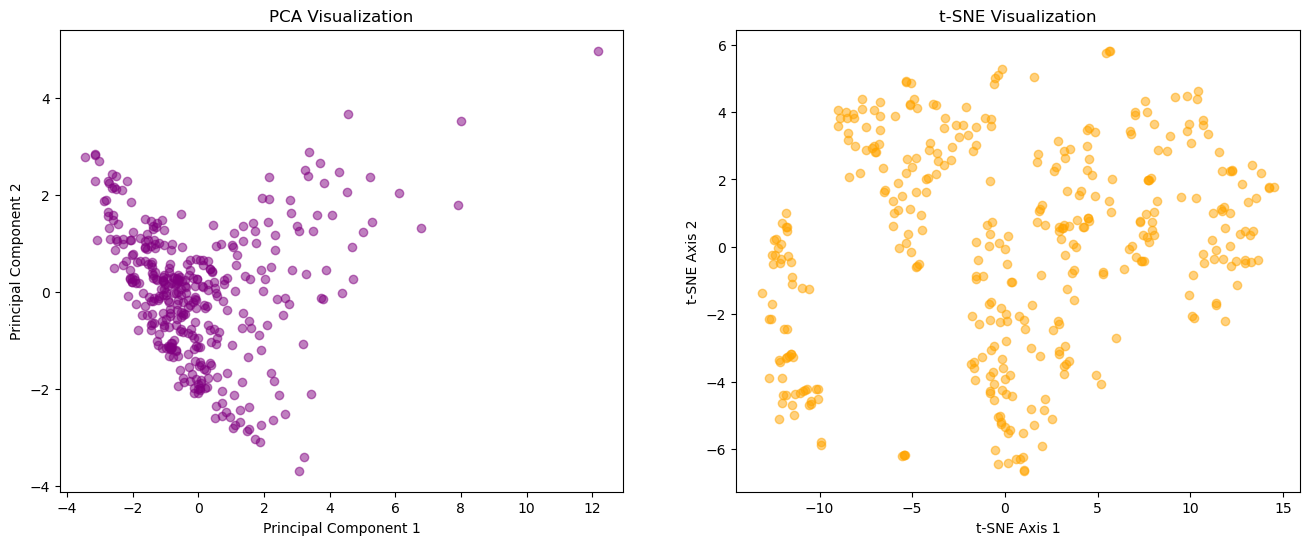

In [32]:
# PCA Analysis
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X)

# Explained Variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Explained by 2 PCs:", sum(pca.explained_variance_ratio_))

# t-SNE Analysis
tsne = TSNE(n_components=2, perplexity=50, n_iter=300)
X_tsne = tsne.fit_transform(X)

# Compare PCA and t-SNE visually
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c='purple', alpha=0.5)
ax[0].set_title('PCA Visualization')
ax[0].set_xlabel('Principal Component 1')
ax[0].set_ylabel('Principal Component 2')

ax[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c='orange', alpha=0.5)
ax[1].set_title('t-SNE Visualization')
ax[1].set_xlabel('t-SNE Axis 1')
ax[1].set_ylabel('t-SNE Axis 2')

plt.show()

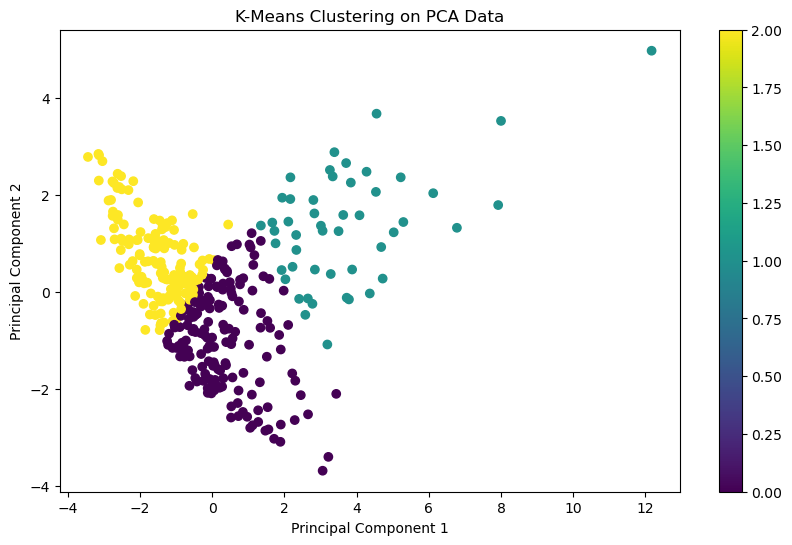

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Applying K-Means to PCA data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(X_pca)

# Visualizing the PCA clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_pca.labels_, cmap='viridis')
plt.title('K-Means Clustering on PCA Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

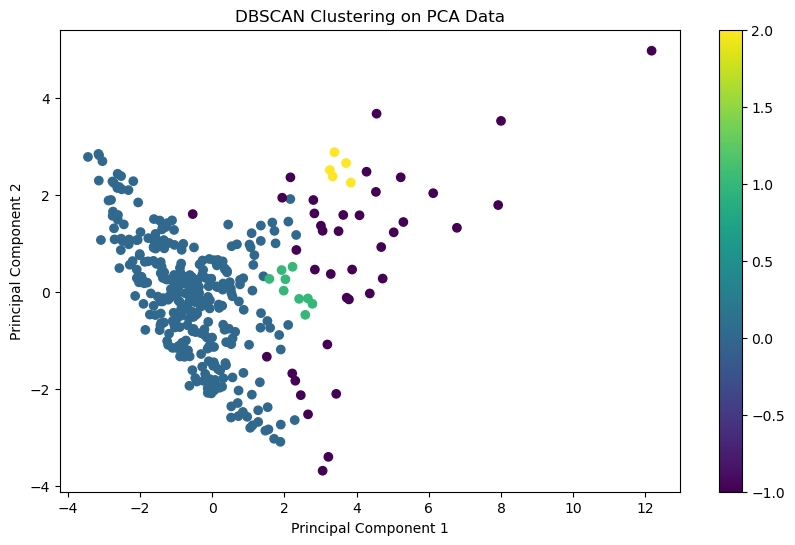

In [34]:
from sklearn.cluster import DBSCAN

# Applying DBSCAN to PCA data
dbscan_pca = DBSCAN(eps=0.5, min_samples=5)
clusters_pca = dbscan_pca.fit_predict(X_pca)

# Visualizing the PCA clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_pca, cmap='viridis')
plt.title('DBSCAN Clustering on PCA Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

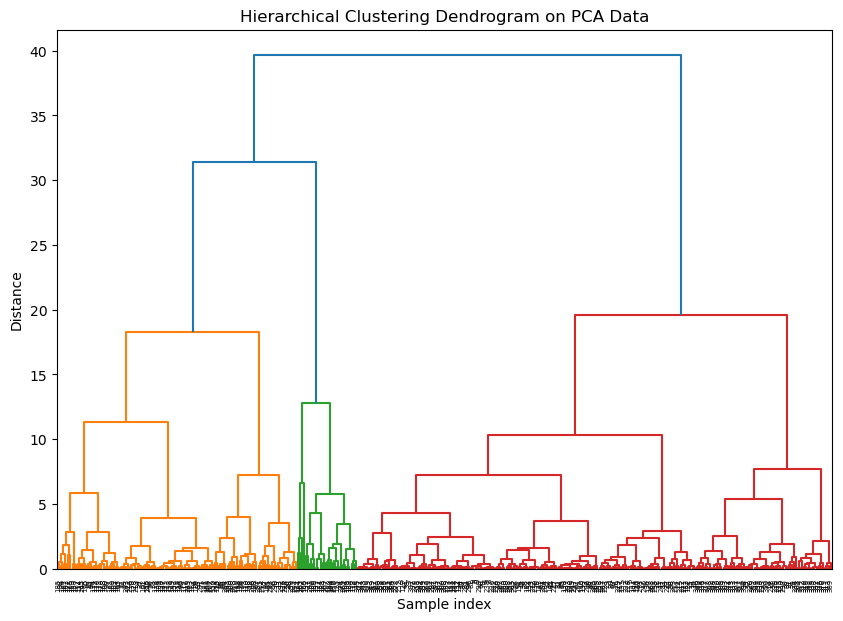

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Applying Hierarchical Clustering to PCA data
linked_pca = linkage(X_pca, method='ward')

# Plotting the dendrogram for PCA data
plt.figure(figsize=(10, 7))
dendrogram(linked_pca, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram on PCA Data')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


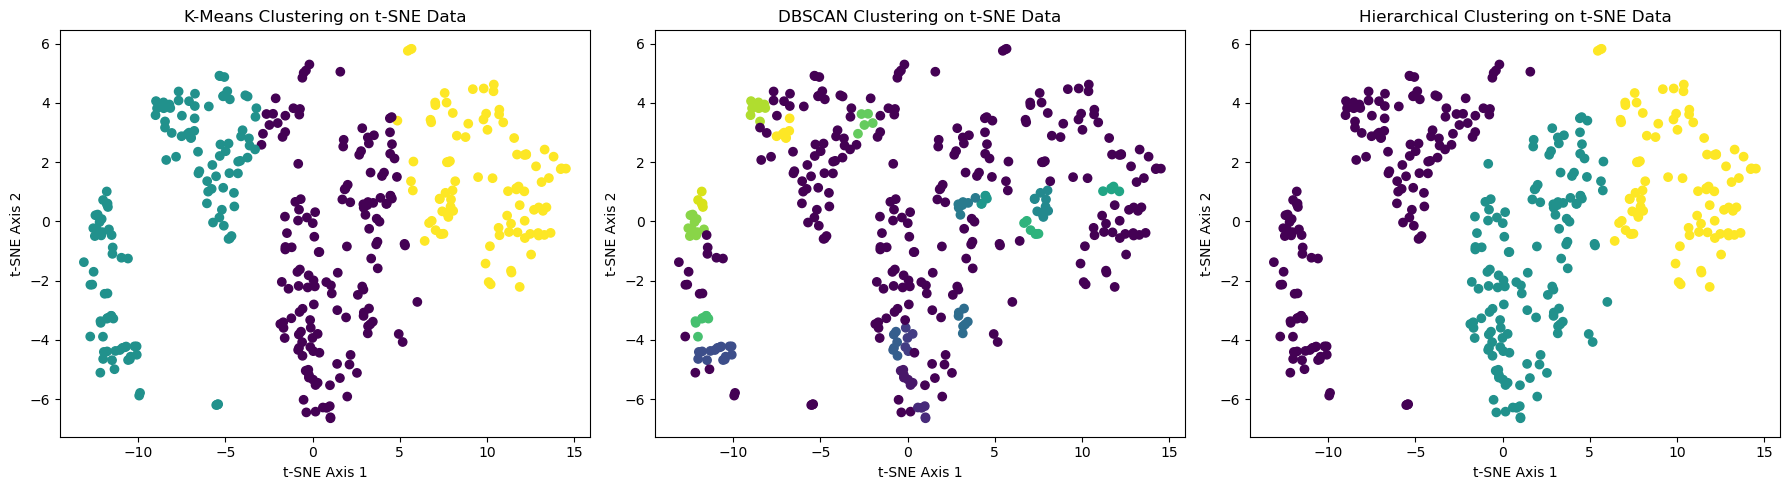

In [36]:
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Assume 'X_tsne' is your t-SNE processed data, obtained similarly to X_pca
# X_tsne = tsne.fit_transform(X)  # This would be your t-SNE transformation code

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_tsne = kmeans.fit(X_tsne)
kmeans_tsne_labels = kmeans_tsne.labels_

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_tsne = dbscan.fit(X_tsne)
dbscan_tsne_labels = dbscan_tsne.labels_

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_tsne = hierarchical.fit(X_tsne)
hierarchical_tsne_labels = hierarchical_tsne.labels_

# Plotting the results
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# K-Means Plot
axes[0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_tsne_labels, cmap='viridis', marker='o')
axes[0].set_title('K-Means Clustering on t-SNE Data')
axes[0].set_xlabel('t-SNE Axis 1')
axes[0].set_ylabel('t-SNE Axis 2')

# DBSCAN Plot
axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=dbscan_tsne_labels, cmap='viridis', marker='o')
axes[1].set_title('DBSCAN Clustering on t-SNE Data')
axes[1].set_xlabel('t-SNE Axis 1')
axes[1].set_ylabel('t-SNE Axis 2')

# Hierarchical Plot
axes[2].scatter(X_tsne[:, 0], X_tsne[:, 1], c=hierarchical_tsne_labels, cmap='viridis', marker='o')
axes[2].set_title('Hierarchical Clustering on t-SNE Data')
axes[2].set_xlabel('t-SNE Axis 1')
axes[2].set_ylabel('t-SNE Axis 2')

plt.tight_layout()
plt.show()